In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

In [10]:
x_data = [ 338.,  333.,  328. , 207. , 226.  , 25. , 179. ,  60. , 208.,  606.]
y_data = [  640.  , 633. ,  619.  , 393.  , 428. ,   27.  , 193.  ,  66. ,  226. , 1591.]

In [11]:
x = np.arange(-200,-100,1) #bias\n",
y = np.arange(-5,5,0.1) #weight\n",
Z =  np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2
            Z[j][i] = Z[j][i]/len(x_data)

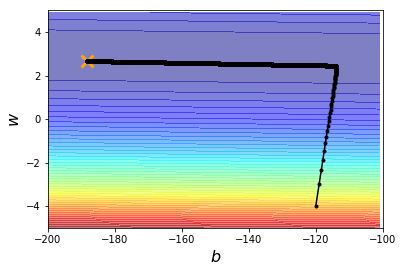

In [12]:
#ydata = b + w * xdata \n",
b = -120 # initial b\n",
w = -4 # initial w\n",
lr = 1 # learning rate\n",
iteration = 100000

b_lr = 0.0
w_lr = 0.0

# 存储参数，之后用于可视化
b_history = [b]
w_history = [w]


for i in range(iteration):

    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
        

    b = b - lr/np.sqrt(b_lr) * b_grad 
    w = w - lr/np.sqrt(w_lr) * w_grad


    b_history.append(b)
    w_history.append(w)

   
    
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

# 其他实现

In [13]:
# 假设x_data和y_data都有10笔，分别代表宝可梦进化前后的cp值
x_data=[338.,333.,328.,207.,226.,25.,179.,60.,208.,606.]
y_data=[640.,633.,619.,393.,428.,27.,193.,66.,226.,1591.]
# 这里采用最简单的linear model：y_data=b+w*x_data
# 我们要用gradient descent把b和w找出来
# 计算梯度微分的函数getGrad()
def getGrad(b,w):
    # initial b_grad and w_grad
    b_grad=0.0
    w_grad=0.0
    for i in range(10):
        b_grad+=(-2.0)*(y_data[i]-(b+w*x_data[i]))
        w_grad+=(-2.0*x_data[i])*(y_data[i]-(b+w*x_data[i]))
    return (b_grad,w_grad)

the function will be y_data=-188.3668387495323+2.6692640713379903*x_data
error 0 is: 73.84441736270833 
error 1 is: 67.4980970060185 
error 2 is: 68.15177664932844 
error 3 is: 28.8291759825683 
error 4 is: 13.113158627146447 
error 5 is: 148.63523696608252 
error 6 is: 96.43143001996799 
error 7 is: 94.21099446925288 
error 8 is: 140.84008808876973 
error 9 is: 161.7928115187101 
the average error is 89.33471866905532


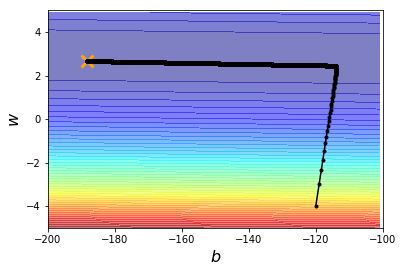

In [15]:
# 这里给b和w不同的learning rate 

# y_data = b + w * x_data
b = -120 # initial b
w = -4 # initial w
lr = 1 # learning rate 放大10倍
iteration = 100000 # 这里直接规定了迭代次数，而不是一直运行到b_grad和w_grad都为0(事实证明这样做不太可行)

# store initial values for plotting，我们想要最终把数据描绘在图上，因此存储过程数据
b_history = [b]
w_history = [w]

lr_b = 0
lr_w = 0

# iterations
for i in range(iteration):
    
    # get new b_grad and w_grad
    b_grad,w_grad=getGrad(b,w)
    
    # get the different learning rate for b and w
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    # 这一招叫做adagrad，之后会详加解释
    # update b and w with new learning rate
    b -= lr / np.sqrt(lr_b) * b_grad  
    w -= lr / np.sqrt(lr_w) * w_grad
    
    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)
    
    # output the b w b_grad w_grad
    # print("b: "+str(b)+"\t\t\t w: "+str(w)+"\n"+"b_grad: "+str(b_grad)+"\t\t w_grad: "+str(w_grad)+"\n")
    
# output the final function and its error
print("the function will be y_data="+str(b)+"+"+str(w)+"*x_data")
error=0.0
for i in range(10):
    print("error "+str(i)+" is: "+str(np.abs(y_data[i]-(b+w*x_data[i])))+" ")
    error+=np.abs(y_data[i]-(b+w*x_data[i]))
average_error=error/10
print("the average error is "+str(average_error))

# plot the figure
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()